<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0


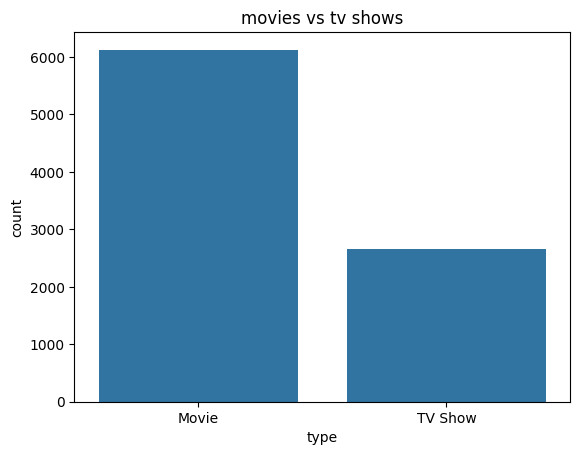

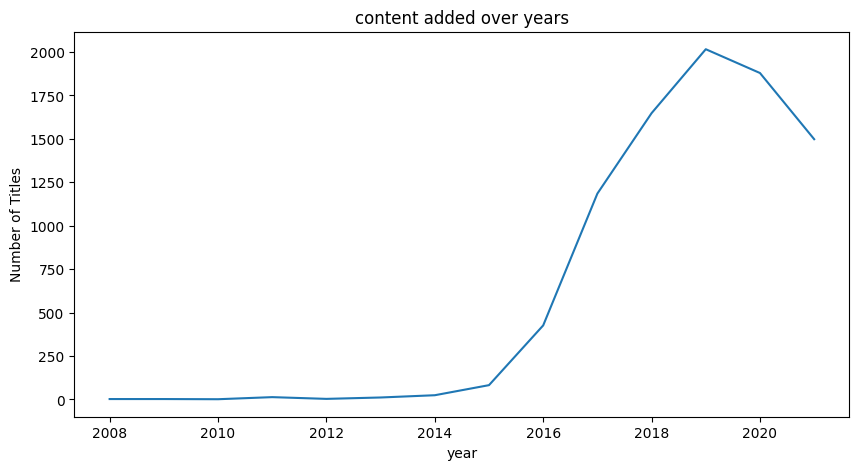

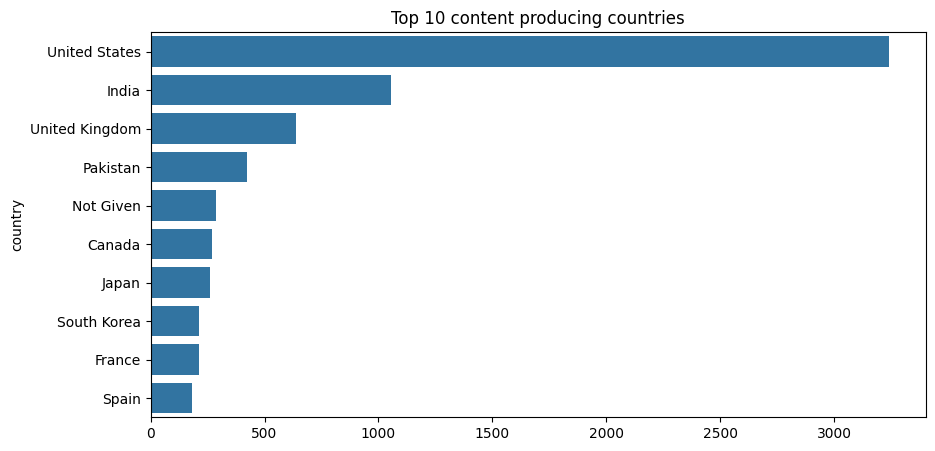

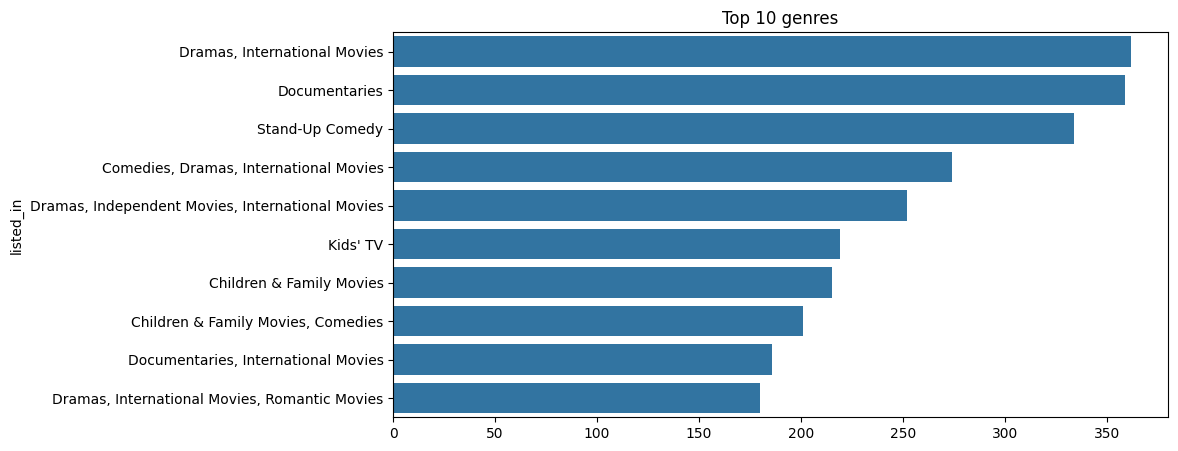

In [4]:

#week4 class16 monday 23/2

#netflix data(data analysis on netflix data)
'''
Analyze netflix data to understand content growth and type distribution (movie or tv show) and country contribution
1) how many total titles are on netflix
2) movies vs Tv shows
3) content grown voer time(how)?
4) which countries produce more content
5) what are the most common genre
'''

import pandas as pd
df=pd.read_csv('netflix.csv')
df.head()

df.info()
df.columns
df.describe()

print((df =='Not given').sum())
df=df.replace('Not given',pd.NA)
print((df == 'not given').sum())
df.isnull().sum()

df.head(20)
#filling values
df['country']=df['country'].fillna('None')
df['director']=df['director'].fillna('None')
df.isnull().sum()
df.head(20)


#convert date to real datatime
df['date_added']= pd.to_datetime(df['date_added'])
#extracted year
df['year']=df['date_added'].dt.year
df.head()

#analysis we want to how many types of titles there
total_titles=df.shape[0]
print("Total Titles:",total_titles)


#p2
print(df['type'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='type', data =df)
plt.title('movies vs tv shows')
plt.show()

#p3
year_counts=df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_counts.plot(kind='line')
plt.title("content added over years")
plt.xlabel("year")
plt.ylabel("Number of Titles")
plt.show()

#p4
top_countries=df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values,y=top_countries.index)
plt.title("Top 10 content producing countries")
plt.show()

#p5
top_genres=df['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values,y=top_genres.index)
plt.title("Top 10 genres")
plt.show()



#class17 tuesday

#plotting
#plotly

import plotly.express as px

fig=px.histogram(
    df,
    x='year',
    color='type',
    title='netflix content over years',
    nbins=30
)
fig.show()


fig=px.histogram(
    df,
    x='year',
    color='type',
    animation_frame='year',
    title='netflix content over years',
    #nbins=30
)
fig.show()


fig=px.bar(
    df.groupby(['year','type']).size().reset_index(name='count'),
    x='year',
    y='count',
    color='type',
    title='netflix content by year'
)

'''
fig.update_layout(
    updatemenus= [
        dict(
            buttons=list([
                dict(
                    label='all',
                    metho='update',
                    args=[{'visible':[True,True]}]
                ),
                dict(
                    label='all',
                    metho='update',
                    args=[{'visible':[True,True]}]
                ),
                dict(
                    label='all',
                    metho='update',
                    args=[{'visible':[True,True]}]
                )
            ]
            )
        )
    ]
)
fig.show()
'''
'''
filtered=df[df['country'].isin(['India','united States'])]
genre_country = (filtered.assign(Genre=filtered['listed_in'].str.split(',')).explode('Genre').groupby(['country','Genre']).size().reset_index(name='count'))

fig=px.bar(
    genre_country,
    x='Genre',
    y='count',
    color='country',
    barmode='group',
    title='genre distribution by country'
)

fig.update_layout(xaxis_tickangle=(-45))
fig.show()

df['month_added']=pd.to_datetime(df['date_added'])
#extract year
df['month_added']=df['date_added'].dt.month
df.head()

month_count=df['month_added'].value_counts().sort_index().reset_index()
month_count.columns=['month','count']

fig=px.bar(
    month_count,
    x='month',
    y='count',
    title='content added over month'
)
fig.show()
'''


#class 17 HW
# Remove 10 11 illa




In [ ]:

#class18
#ML
#AI- AI is a branch  in which it buidling systyem  that can perfom task which requires terms

'''
superviserd learning- you want to give a label to the data ex: spam or not spam
two types
classification - predict the data in the form of 0 or 1
Regression - predict the data in the form of continous value
unsuperviserd learning - it is a
two types
clustering
association rule learning
semi supervised learning - combination of superviserd learning and unsuperviserd learning or combination of labelled and unlabelled data
reinforcement learning -
linear regresion is a regression give a numerical vlaue
logistic regression - used to solve classification problem
why we need to use logistic why cant we use linear for classification
'''


from sklearn.linear_model import LogisticRegression
import numpy as np
data=np.array([
    [2500,500],
    [45000,600],
    [55000,700],
    [15000,500],
    [35000,550],
    [350000,500],
    [75000,800]
])
y=np.array([0,1,1,1,0,0,1])
model=LogisticRegression()
model.fit(data,y)
pre=model.predict([[45000,600]])
print(pre)


from sklearn.linear_model import LinearRegression
import numpy as np
data=np.array([
    [25,120,80,90],
    [45,140,90,130],
    [50,150,95,160],
    [30,110,75,85],
    [60,170,100,180],
    [35,130,85,120],
    [55,160,98,170]
])
y=np.array([0,1,1,0,1,0,1])
model=LogisticRegression()
model.fit(data,y)
new_patient=[[48,145,92,150]]
prediction=model.predict(new_patient)
print(prediction)


#Decision Tree
'''
it is a algorithm
used for clasification and regression both
it is a tree like structure
'''
#entropy
#infromation gain
#gini index
#churn create notes if poosible and upload it
#id3
#c4.5
#cart
#A model for fraud detection using logistic regression will it work


[1]
[1]


[[ 2]
 [ 5]
 [ 7]
 [12]
 [10]
 [ 9]
 [ 8]
 [18]
 [20]] [ 74  84  75 110 105 130 150 145 120]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



boundry near age [4.15075377]
boundry near age [6.48743719]
boundry near age [7.61809045]
boundry near age [8.52261307]
boundry near age [9.35175879]
boundry near age [10.63316583]
boundry near age [14.55276382]
boundry near age [18.24623116]


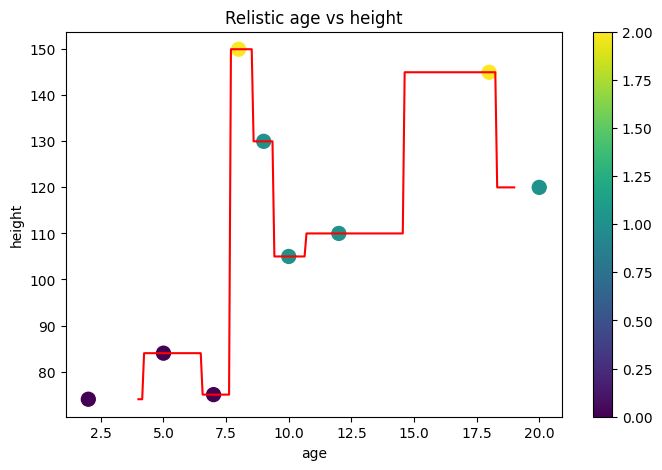

In [5]:
#class20
#Friday 27/2

'''
Types of Logistic Regression
Binomial Logistic Regression -- ex: true or false / 0 or 1
Multinomial Logistic Regression: -- more than two ex:group of anmials - cat,dog,sheep
Ordinal Logistic Regression
'''



'''
monthly task (10 days time)
Task1 ---- create a report what we studied in 20 classes what project we made
we want to create one project based on your choice take help from notes and resources
and cover all the topics(pandas, numpy excel dashboard create model using everything and corelate)

Task2--- student performance dataset using multinomial regression do classification and regression



#supervised learning
 cover classificatin+logistic regression + feature engineering (capstone projects)
1) wine quality detection
2)image classification
3) pneumonia  diseases detection through x-rays
'''


#Multinomial Regressions

#predict the height based on the age

import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
#data
ages=np.array([2,5,7,12,10,9,8,18,20]).reshape(9,1)
height=np.array([74,84,75,110,105,130,150,145,120])
print(ages,height)

hclass=[]
for i in height:
  if i < 100:
    hclass.append(0) #short
  elif i <=130:
    hclass.append(1) #tall
  else:
    hclass.append(2) #tallest

hclass=np.array(hclass)

model=LogisticRegression()
model.fit(ages,height)



age_range = np.linspace(4,19,200).reshape(-1,1)
pre = model.predict(age_range)
for i in range(len(pre)-1):
  if pre[i]!= pre[i+1]:
    print('boundry near age',age_range[i])

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(ages,height,c=hclass, cmap='viridis',s=100)
plt.plot(age_range,pre,color='red')
plt.xlabel('age')
plt.ylabel('height')
plt.title("Relistic age vs height")
plt.colorbar()
plt.show()

'''
age_range = np.linspace(4,19,200).reshape(-1,1)
pre = model.predict(age_range)
for i in range(len(pre)-1):
  if pre[i]!= pre[i+1]:
    print('boundry near age',age_range[i])
'''






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

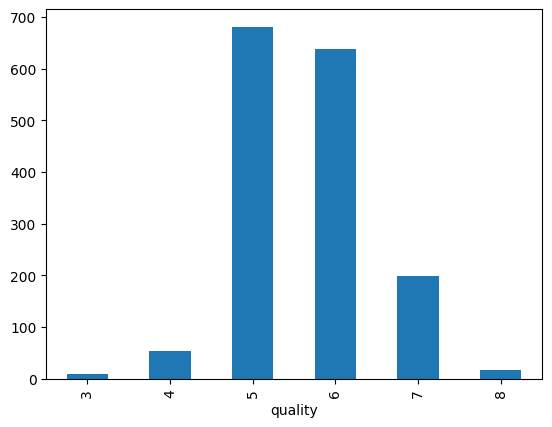

In [7]:
#class 20 and 21

'''
use cases:
predict wine quality using regression or classification models
explore correlations between chemical properties and taste
Benchmark feature engineering and model turning techniques
Create visualizations for education or storytelling purpose
'''


import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()
df['quality'].value_counts()

df.shape
df.info()

print(df.isnull().sum())
print(df.duplicated().sum())

df.columns = df.columns.str.strip() #remove white spaces

import matplotlib.pyplot as plt
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.show()


